### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import precision_score, make_scorer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [ ]:
df=pd.read_csv('/content/close_1h.csv')

In [ ]:
df.set_index('startTime',inplace=True)
df.head()

,close
startTime,
2024-07-25 19:00:00,5656315
2024-07-25 20:00:00,5709340
2024-07-25 21:00:00,5757614
2024-07-25 22:00:00,5740132
2024-07-25 23:00:00,5753248


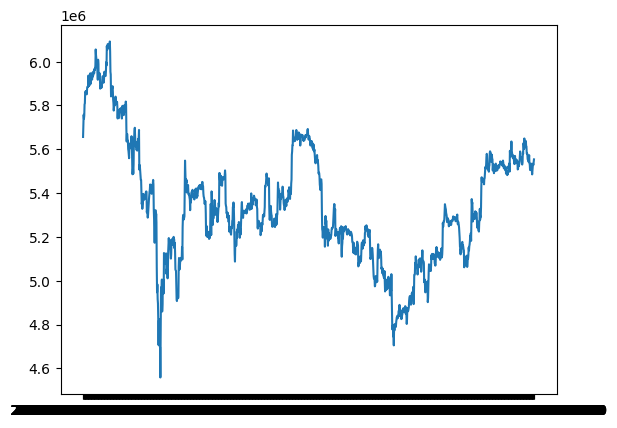

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df)

In [ ]:
df.head()

,close
startTime,
2024-07-25 19:00:00,5656315
2024-07-25 20:00:00,5709340
2024-07-25 21:00:00,5757614
2024-07-25 22:00:00,5740132
2024-07-25 23:00:00,5753248


In [ ]:

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(df)

In [ ]:
df1[:10]

array([[0.71584459],
       [0.75040937],
       [0.78187717],
       [0.77048138],
       [0.77903116],
       [0.81285999],
       [0.81572882],
       [0.84879367],
       [0.85039659],
       [0.85230719]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(975, 525)

In [ ]:
training_size,test_size

(975, 525)

In [ ]:
def create_dataset(dataset, time_step=100):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_test.shape,ytest.shape

((424, 100), (424,))

In [ ]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step - loss: 0.1642 - val_loss: 0.0111
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0136 - val_loss: 0.0060
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 0.0076 - val_loss: 0.0037
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - loss: 0.0058 - val_loss: 0.0033
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - loss: 0.0039 - val_loss: 0.0017
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2

'2.1.0'

In [ ]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5357613.116514905

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

5310104.763146451

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, test_predict)
r2

-1362994864243182.0

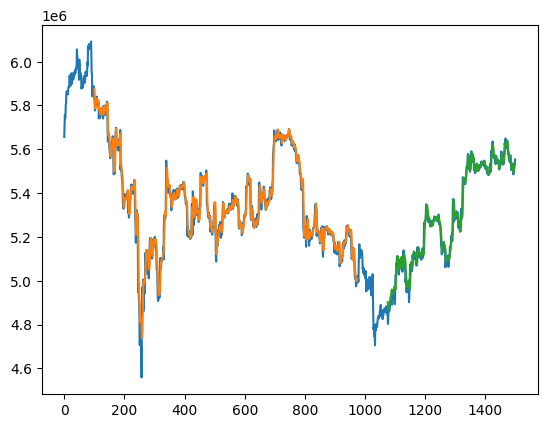

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

525

In [ ]:
x_input=test_data[-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input[1:10]

[0.6293280124322393,
 0.621402068737142,
 0.6176675731841184,
 0.6216132707897128,
 0.6268841960893723,
 0.6080402796210875,
 0.605619278314764,
 0.6127395252907939,
 0.6134135466560977]

In [ ]:
# demonstrate prediction for next 10 hours
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.6453843]
101
1 day input [0.62932801 0.62140207 0.61766757 0.62161327 0.6268842  0.60804028
 0.60561928 0.61273953 0.61341355 0.60234695 0.60621312 0.60486508
 0.61238035 0.62802038 0.62287527 0.63409049 0.6370597  0.61273431
 0.67462238 0.65830181 0.6577197  0.67176137 0.67851658 0.7023798
 0.6761927  0.66791802 0.66228792 0.6557726  0.65283728 0.66071172
 0.65327728 0.6491256  0.6425477  0.63509565 0.64702987 0.65934739
 0.63761965 0.64282734 0.64941111 0.64156535 0.64231303 0.64745228
 0.63769396 0.64422623 0.61904951 0.62105984 0.63157823 0.63134942
 0.62918526 0.6371112  0.64207901 0.65670345 0.67261791 0.65433329
 0.65417945 0.65158115 0.64995932 0.65450473 0.63529512 0.63367395
 0.63924669 0.66879737 0.66518478 0.69710301 0.69242788 0.67992264
 0.71131026 0.69271601 0.68495889 0.7005533  0.70132901 0.70365614
 0.68781664 0.68722932 0.66643895 0.6671586  0.66476498 0.65036608
 0.64778994 0.65699874 0.64180849 0.65072656 0.66162367 0.63695997
 0.63416871 0.61750265 0.62767751 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1500

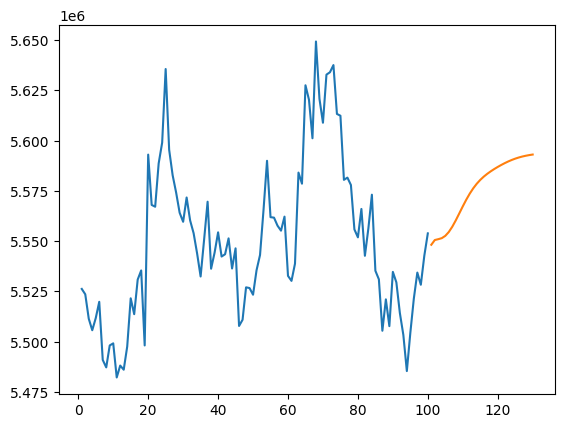

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))